# Survey Exploratory Data Analysis Report

This notebook performs an automated EDA on the `umfrage.xlsx` file containing survey responses from dental practice staff. All outputs are generated automatically via GitHub Actions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Configure matplotlib for better GitHub display
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
plt.ioff()  # Turn off interactive mode

# Ensure plots are saved with high DPI for better quality
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 150

## 1. Load and Inspect Survey Data

In [38]:
# Load the survey data
df = pd.read_excel('umfrage.xlsx')

print(f"Survey Dataset Shape: {df.shape[0]} responses and {df.shape[1]} columns")
print("\nFirst 2 responses (basic info only):")
display(df[['ID', 'Name', 'Startzeit', 'Fertigstellungszeit']].head(2))

Survey Dataset Shape: 26 responses and 32 columns

First 2 responses (basic info only):


,ID,Name,Startzeit,Fertigstellungszeit
0,1,NaN,2025-10-23 14:33:46,2025-10-23 14:47:53
1,2,NaN,2025-10-23 15:09:21,2025-10-23 15:16:48


## 2. Data Quality Overview

In [39]:
print("Data Types Overview:")
print(f"Total columns: {len(df.columns)}")
print(f"Text columns: {df.select_dtypes(include=['object']).shape[1]}")
print(f"Numeric columns: {df.select_dtypes(include=['int64', 'float64']).shape[1]}")
print(f"DateTime columns: {df.select_dtypes(include=['datetime64']).shape[1]}")

Data Types Overview:
Total columns: 32
Text columns: 27
Numeric columns: 3
DateTime columns: 2


In [40]:
# Check for missing values in key columns
key_columns = ['ID', 'Name', 'Startzeit', 'Fertigstellungszeit']
missing_key = df[key_columns].isnull().sum()
print("Missing values in key columns:")
for col, missing in missing_key.items():
    print(f"{col}: {missing} ({missing/len(df)*100:.1f}%)")

Missing values in key columns:
ID: 0 (0.0%)
Name: 26 (100.0%)
Startzeit: 0 (0.0%)
Fertigstellungszeit: 0 (0.0%)


In [41]:
# Overall completion rate
total_possible_answers = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
completion_rate = (total_possible_answers - total_missing) / total_possible_answers * 100
print(f"Overall Survey Completion Rate: {completion_rate:.1f}%")
print(f"Total missing values: {total_missing} out of {total_possible_answers} possible answers")

Overall Survey Completion Rate: 92.8%
Total missing values: 60 out of 832 possible answers


## 3. Response Analysis

### Survey Timeline

In [42]:
# Convert time columns to datetime if they're not already
if 'Startzeit' in df.columns:
    df['Startzeit'] = pd.to_datetime(df['Startzeit'], errors='coerce')
if 'Fertigstellungszeit' in df.columns:
    df['Fertigstellungszeit'] = pd.to_datetime(df['Fertigstellungszeit'], errors='coerce')

# Calculate completion time
if 'Startzeit' in df.columns and 'Fertigstellungszeit' in df.columns:
    df['completion_duration'] = (df['Fertigstellungszeit'] - df['Startzeit']).dt.total_seconds() / 60
    
    print("Survey Completion Statistics:")
    print(f"Average completion time: {df['completion_duration'].mean():.1f} minutes")
    print(f"Median completion time: {df['completion_duration'].median():.1f} minutes")
    print(f"Fastest completion: {df['completion_duration'].min():.1f} minutes")
    print(f"Slowest completion: {df['completion_duration'].max():.1f} minutes")

Survey Completion Statistics:
Average completion time: 58.2 minutes
Median completion time: 29.2 minutes
Fastest completion: 7.5 minutes
Slowest completion: 387.2 minutes


### Professional Background Analysis

In [43]:
# Find role/position column (it has a long German name)
role_col = None
for col in df.columns:
    if 'Rolle in der Praxis' in col:
        role_col = col
        break

if role_col:
    print("Roles mentioned in responses:")
    roles = df[role_col].dropna()
    for i, role in enumerate(roles, 1):
        print(f"Response {i}: {role[:100]}{'...' if len(role) > 100 else ''}")
else:
    print("Role column not found")

Roles mentioned in responses:
Response 1: Zahnaerztin mit diverse adm Aufgaben
Response 2: Oralchirurgin / Zahnärztin; Praxisinhaberin
Response 3: Zahnärztin
Response 4: Dentalsekretärin, Administration und Dentalassistentin, wo es mich gerade braucht
Response 5: Ich arbeite als Praxiskoordinatorin und bin für die Terminvergabe, Kreditoren, Debitoren und Persona...
Response 6: Praxisinhaberin, Zahnärztin
Response 7: Praxisinhaberin, Patientenbehandlung, Planung, Personalmanagment, alle administrativen Aufgaben des ...
Response 8: Praxisadministratorin.
Administrative Arbeiten inkl. dem Tagesablauf  managen
Response 9: Zahnarzt , Einzelpraxis
Response 10: Praxismanagerin
Telefonate, Terminvergabe, Korrespondenz mit Versicherungen etc., Rechnungs- und Mah...
Response 11: Administration, Buchhaltung, Personalwesen
Response 12: Empfang und Labor
Response 13: Praxisinhaber
Response 14: Zahnarzt und Eigentümer der Praxus
Zahnmedizin
Response 15: Zahnarzt in eigener Praxis tätig. 
Behandlung 

### Experience Analysis

In [44]:
# Find experience column
experience_col = None
for col in df.columns:
    if 'Wie lange sind Sie' in col:
        experience_col = col
        break

if experience_col:
    print("Experience levels:")
    experiences = df[experience_col].dropna()
    for i, exp in enumerate(experiences, 1):
        print(f"Response {i}: {exp}")
else:
    print("Experience column not found")

Experience levels:
Response 1: > 5 Jahre
Response 2: > 5 Jahre
Response 3: > 5 Jahre
Response 4: > 5 Jahre
Response 5: > 5 Jahre
Response 6: < 5 Jahre
Response 7: > 5 Jahre
Response 8: > 5 Jahre
Response 9: > 5 Jahre
Response 10: > 5 Jahre
Response 11: > 5 Jahre
Response 12: > 5 Jahre
Response 13: > 5 Jahre
Response 14: > 5 Jahre
Response 15: > 5 Jahre
Response 16: > 5 Jahre
Response 17: > 5 Jahre
Response 18: > 5 Jahre
Response 19: > 5 Jahre
Response 20: > 5 Jahre
Response 21: < 5 Jahre
Response 22: < 5 Jahre
Response 23: > 5 Jahre
Response 24: > 5 Jahre
Response 25: > 5 Jahre
Response 26: > 5 Jahre


### Communication Channels Analysis

In [45]:
# Find communication channels column
comm_col = None
for col in df.columns:
    if 'Über welche Kanäle kontaktieren' in col:
        comm_col = col
        break

if comm_col:
    print("Communication channels used:")
    channels = df[comm_col].dropna()
    for i, channel in enumerate(channels, 1):
        print(f"Response {i}: {channel}")
else:
    print("Communication channels column not found")

Communication channels used:
Response 1: Online Formular;Telefon;Persönlich vor Ort;Email;
Response 2: Email;Telefon;
Response 3: Telefon;Persönlich vor Ort;
Response 4: Telefon;Email;Online Formular;
Response 5: Telefon;Email;Online Formular;
Response 6: Telefon;Email;Persönlich vor Ort;
Response 7: Email;Persönlich vor Ort;Telefon;
Response 8: Telefon;Email;Persönlich vor Ort;Messanger Dienste wie What's App, Telegram etc.;
Response 9: Telefon;Email;
Response 10: Telefon;Email;Persönlich vor Ort;
Response 11: Telefon;Email;Persönlich vor Ort;SMS zur Erinnerung;
Response 12: Telefon;
Response 13: Telefon;Email;Persönlich vor Ort;
Response 14: Telefon;Persönlich vor Ort;
Response 15: Telefon;Email;Persönlich vor Ort;
Response 16: Telefon;Email;
Response 17: Telefon;Email;Persönlich vor Ort;
Response 18: Email;Telefon;Persönlich vor Ort;
Response 19: Telefon;Email;
Response 20: Telefon;Briefpost;
Response 21: Telefon;Email;
Response 22: Telefon;Email;
Response 23: Telefon;Email;
Respons

### Software Usage Analysis

In [46]:
# Find software column
software_col = None
for col in df.columns:
    if 'Praxisverwaltungssoftware' in col:
        software_col = col
        break

if software_col:
    print("Practice Management Software used:")
    software = df[software_col].dropna()
    for i, sw in enumerate(software, 1):
        print(f"Response {i}: {sw}")
        
    # Simple analysis of mentioned software
    software_mentions = {}
    for sw in software:
        sw_lower = sw.lower()
        if 'zawin' in sw_lower:
            software_mentions['ZaWin'] = software_mentions.get('ZaWin', 0) + 1
        elif 'charly' in sw_lower:
            software_mentions['Charly'] = software_mentions.get('Charly', 0) + 1
        elif 'evident' in sw_lower:
            software_mentions['Evident'] = software_mentions.get('Evident', 0) + 1
    
    if software_mentions:
        print("\nSoftware usage summary:")
        for sw, count in software_mentions.items():
            print(f"{sw}: {count} mention(s)")
else:
    print("Software column not found")

Practice Management Software used:
Response 1: ZaWin
Response 2: ZaWin
Response 3: ZaWIn
Response 4: Aeskulap Kern Concept
Response 5: ErgoDent
Response 6: ZaWin
Response 7: ZaWin
Response 8: Ergodent, Sidexis
Response 9: Zawin
Response 10: ZaWin
Response 11: Ergodent von CCS
Response 12: Dentalmed XP
Response 13: ZaWin
Response 14: Dental med XP
Response 15: Dent II 
Response 16: aeskulap
Response 17: ProzessTeam
Response 18: ZaWin
Response 19: -
Response 20: Keine
Response 21: Zawin
Response 22: ZaWin
Response 23: Kern Concept - Aeskulap
Response 24: Dental med XP
Response 25: ZaWin
Response 26: ZaWin

Software usage summary:
ZaWin: 13 mention(s)


## 4. Key Challenges and Pain Points

In [47]:
# Find the main challenges/pain points columns
challenge_cols = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['störfaktoren', 'herausforderungen', 'mühsam', 'zeitaufwendig']):
        challenge_cols.append(col)

print(f"Found {len(challenge_cols)} columns related to challenges:")
for i, col in enumerate(challenge_cols, 1):
    print(f"{i}. {col[:80]}{'...' if len(col) > 80 else ''}")
    
    # Show responses for this challenge
    responses = df[col].dropna()
    if len(responses) > 0:
        print("   Responses:")
        for j, response in enumerate(responses, 1):
            print(f"   Response {j}: {response[:150]}{'...' if len(response) > 150 else ''}")
    print()

Found 3 columns related to challenges:
1. Was sind die grössten "Störfaktoren" oder Unterbrechungen bei Ihrer täglichen ad...
   Responses:
   Response 1: Die Aufgaben und Fragen die nur ich antworten kann
   Response 2: Qualitätsmangement, Versicherungsanfragen
   Response 3: das Personal
   Response 4: Telefon, neuer Termin vergeben
   Response 5: Personal, wo Fragen hat, Vorgesetzte die sonst noch Wünsche oder Probleme haben. Patienten die ganze Planung ändern möchten. 
   Response 6: Nächster Patient, Rückfragen von Mitarbeitern
   Response 7: Die administrative Arbeit wird zwischen den Patientenbehandlungen oder Abends oder am Wochenende erledigt, es ist kein "Bürotag" bestimmt. Dadurch gib...
   Response 8: MA kommen ständig was fragen, Telefone, Patientenanfragen vor Ort, Krankmeldungen, neue Planungen etc..
   Response 9: Telefon, Patientennotfall
   Response 10: Telefonate und Terminvergabe gleichzeitig, oder man hat einen recht anspruchsvollen Antrag an die Versicherung zu sc

## 5. Digital Transformation Insights

In [48]:
# Find digital transformation related columns
digital_cols = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['digital', 'online', 'automatisch', 'ki', 'assistent']):
        digital_cols.append(col)

print(f"Found {len(digital_cols)} columns related to digital transformation:")
for i, col in enumerate(digital_cols, 1):
    print(f"{i}. {col[:80]}{'...' if len(col) > 80 else ''}")
    
    # Show responses
    responses = df[col].dropna()
    if len(responses) > 0:
        print("   Responses:")
        for j, response in enumerate(responses, 1):
            print(f"   Response {j}: {response[:150]}{'...' if len(response) > 150 else ''}")
    print()

Found 4 columns related to digital transformation:
1. Welche anderen digitalen Tools oder Programme nutzen Sie regelmässig im administ...
   Responses:
   Response 1: BESR
   Response 2: Trios, Rö-Software Orange
   Response 3: alle die wir benötigen 
   Response 4: Mediport, Byzz
   Response 5: Outlook, Swisstransfer, Condent
   Response 6: Digitale Anamnese am Tablet, Scanner der Sterilisationsetiketten, Nostic, Onlineagenda, Materialbestellung Novadent
   Response 7: Excel, Word, Acrobat, OnyxCeph, Sidexis, Outlook
   Response 8: Anyguard, Diagnokat, Nostic, Q.Wiki
   Response 9: Digit. Röntgen, Cerec
   Response 10: Romexis (Röntgenprogramm)
Onyx Ceph (Auswertungsprogramm von Röntgen und Modellen)
Outlook
   Response 11: Abaweb, MedMonitor, Sidexis, DS Core
   Response 12: dig. RX-Programm von Curaden
   Response 13: Sidexis /Outlook/ Office-Produkte
   Response 14: Excel, Word
   Response 15: Windows, Carestream CS, Mailprogramme, Abrechnungsprogramme (Mediport)
   Response 16: Di

## 7. Graphical Response Analysis

### Survey Completion Time Analysis

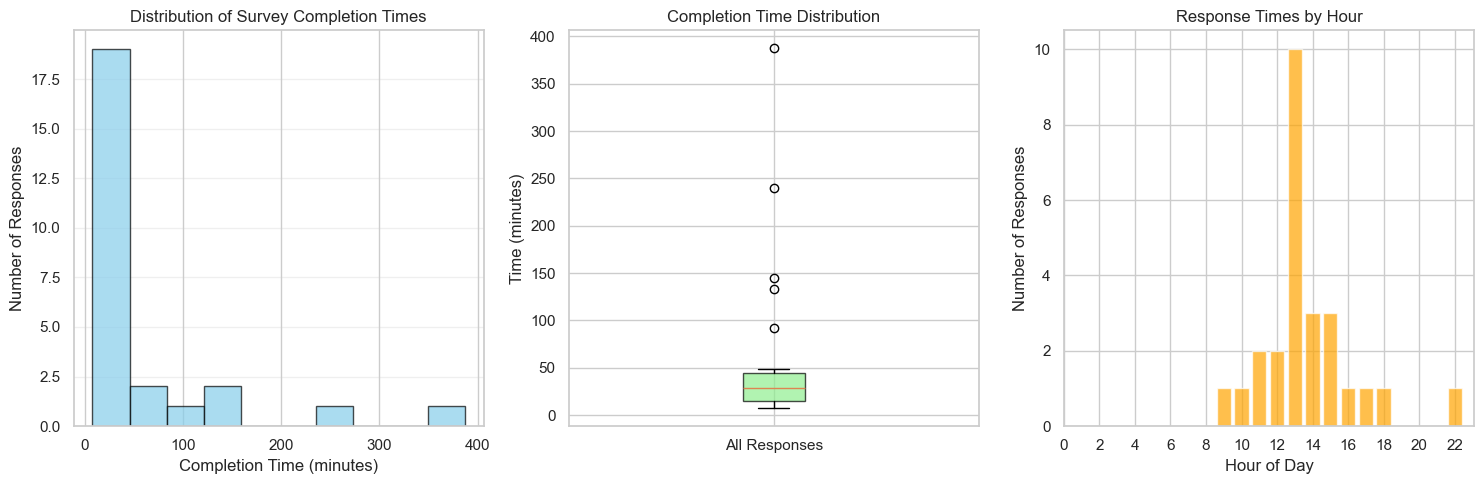

In [49]:
# Enhanced completion time visualization
if 'completion_duration' in df.columns:
    plt.figure(figsize=(15, 5))
    
    # Subplot 1: Histogram of completion times
    plt.subplot(1, 3, 1)
    plt.hist(df['completion_duration'].dropna(), bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Survey Completion Times')
    plt.xlabel('Completion Time (minutes)')
    plt.ylabel('Number of Responses')
    plt.grid(axis='y', alpha=0.3)
    
    # Subplot 2: Box plot
    plt.subplot(1, 3, 2)
    plt.boxplot(df['completion_duration'].dropna(), patch_artist=True, 
                boxprops=dict(facecolor='lightgreen', alpha=0.7))
    plt.title('Completion Time Distribution')
    plt.ylabel('Time (minutes)')
    plt.xticks([1], ['All Responses'])
    
    # Subplot 3: Timeline of responses
    plt.subplot(1, 3, 3)
    if 'Startzeit' in df.columns:
        response_times = df['Startzeit'].dt.hour.value_counts().sort_index()
        plt.bar(response_times.index, response_times.values, color='orange', alpha=0.7)
        plt.title('Response Times by Hour')
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Responses')
        plt.xticks(range(0, 24, 2))
    
    plt.tight_layout()
    plt.show()
else:
    print("Completion duration data not available")

### Professional Role Analysis with Visualizations

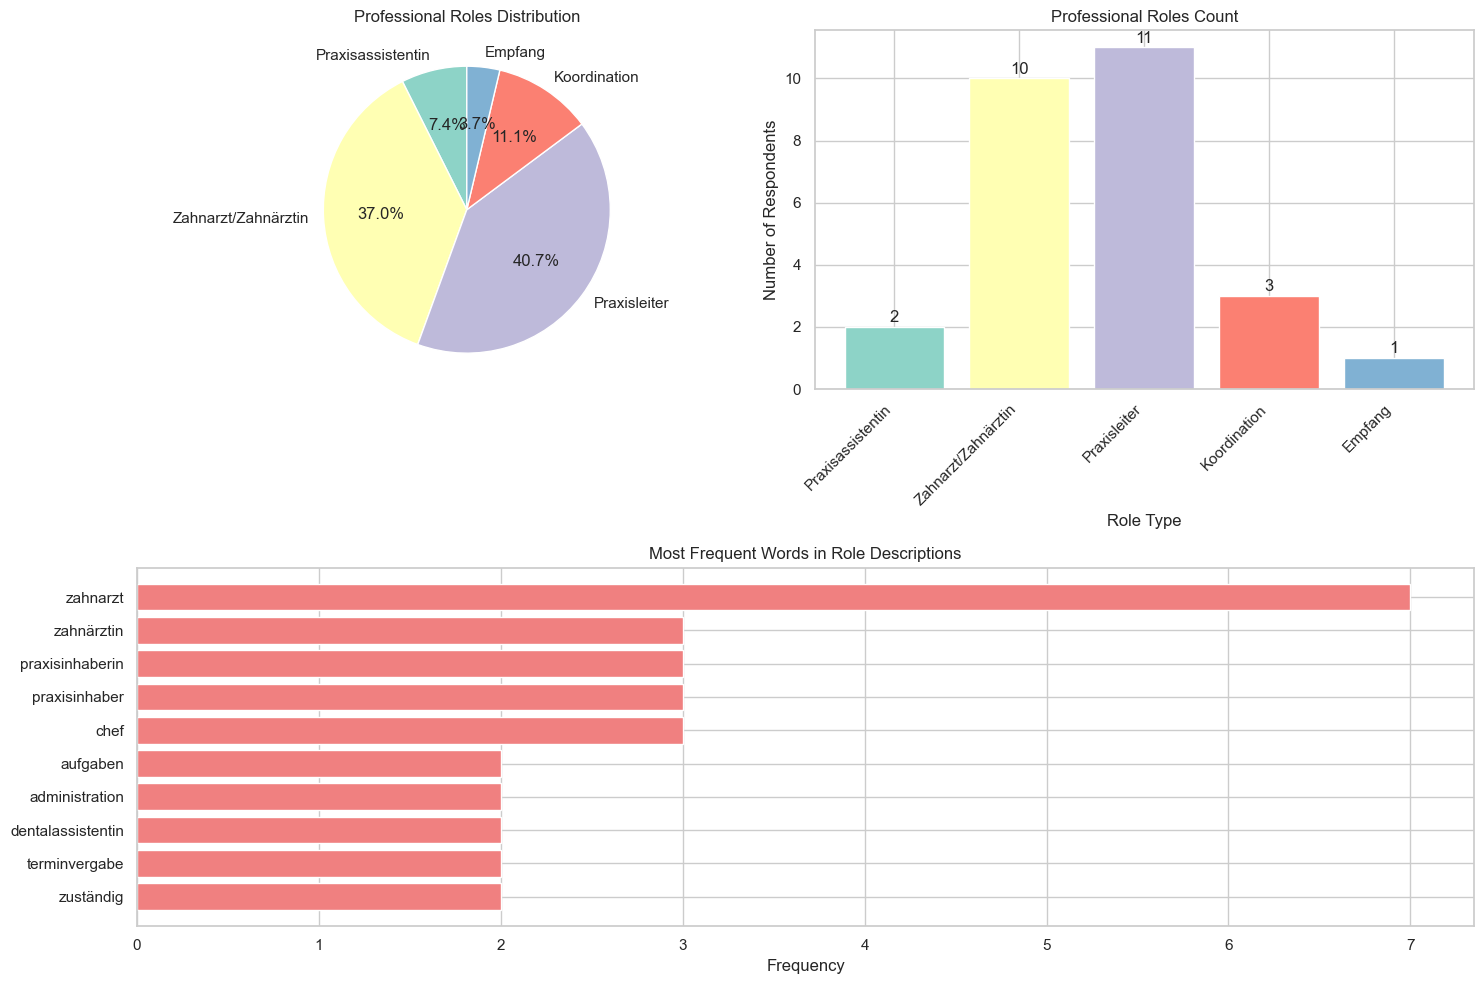

Role Analysis Summary:
- Praxisassistentin: 2 respondent(s)
- Zahnarzt/Zahnärztin: 10 respondent(s)
- Praxisleiter: 11 respondent(s)
- Koordination: 3 respondent(s)
- Empfang: 1 respondent(s)


In [50]:
# Role analysis with advanced text processing and visualization
role_col = None
for col in df.columns:
    if 'Rolle in der Praxis' in col:
        role_col = col
        break

if role_col and not df[role_col].dropna().empty:
    # Extract key role types from responses
    role_keywords = {
        'Praxisassistentin': ['assistentin', 'assistent'],
        'Zahnarzt/Zahnärztin': ['zahnarzt', 'zahnärztin', 'arzt', 'ärztin'],
        'Praxisleiter': ['leiter', 'leiterin', 'chef', 'inhaber'],
        'Koordination': ['koordin', 'organisation', 'planung'],
        'Empfang': ['empfang', 'rezeption', 'front office']
    }
    
    role_counts = {role: 0 for role in role_keywords.keys()}
    
    for response in df[role_col].dropna():
        response_lower = response.lower()
        for role, keywords in role_keywords.items():
            if any(keyword in response_lower for keyword in keywords):
                role_counts[role] += 1
    
    # Create visualizations
    plt.figure(figsize=(15, 10))
    
    # Pie chart of roles
    plt.subplot(2, 2, 1)
    valid_roles = {k: v for k, v in role_counts.items() if v > 0}
    if valid_roles:
        colors = plt.cm.Set3(range(len(valid_roles)))
        plt.pie(valid_roles.values(), labels=valid_roles.keys(), autopct='%1.1f%%', 
                colors=colors, startangle=90)
        plt.title('Professional Roles Distribution')
    
    # Bar chart of roles
    plt.subplot(2, 2, 2)
    if valid_roles:
        bars = plt.bar(valid_roles.keys(), valid_roles.values(), 
                      color=plt.cm.Set3(range(len(valid_roles))))
        plt.title('Professional Roles Count')
        plt.xlabel('Role Type')
        plt.ylabel('Number of Respondents')
        plt.xticks(rotation=45, ha='right')
        
        # Add value labels on bars
        for bar, count in zip(bars, valid_roles.values()):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                     f'{count}', ha='center', va='bottom')
    
    # Word frequency analysis
    plt.subplot(2, 1, 2)
    from collections import Counter
    import re
    
    # Combine all role descriptions
    all_text = ' '.join(df[role_col].dropna().astype(str))
    # Extract meaningful words (German)
    words = re.findall(r'\b[a-zA-ZäöüÄÖÜß]{4,}\b', all_text.lower())
    
    # Filter out common stopwords and keep relevant terms
    stopwords = {'sind', 'sich', 'eine', 'einen', 'einer', 'mich', 'für', 'und', 'der', 'die', 'das', 'ich', 'bin', 'haben', 'mit', 'von', 'auf', 'als', 'auch', 'oder'}
    relevant_words = [word for word in words if word not in stopwords and len(word) > 3]
    
    word_freq = Counter(relevant_words).most_common(10)
    
    if word_freq:
        words, counts = zip(*word_freq)
        plt.barh(range(len(words)), counts, color='lightcoral')
        plt.yticks(range(len(words)), words)
        plt.title('Most Frequent Words in Role Descriptions')
        plt.xlabel('Frequency')
        plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    print("Role Analysis Summary:")
    for role, count in role_counts.items():
        if count > 0:
            print(f"- {role}: {count} respondent(s)")
else:
    print("Role data not available for analysis")

### Communication Channels Visualization

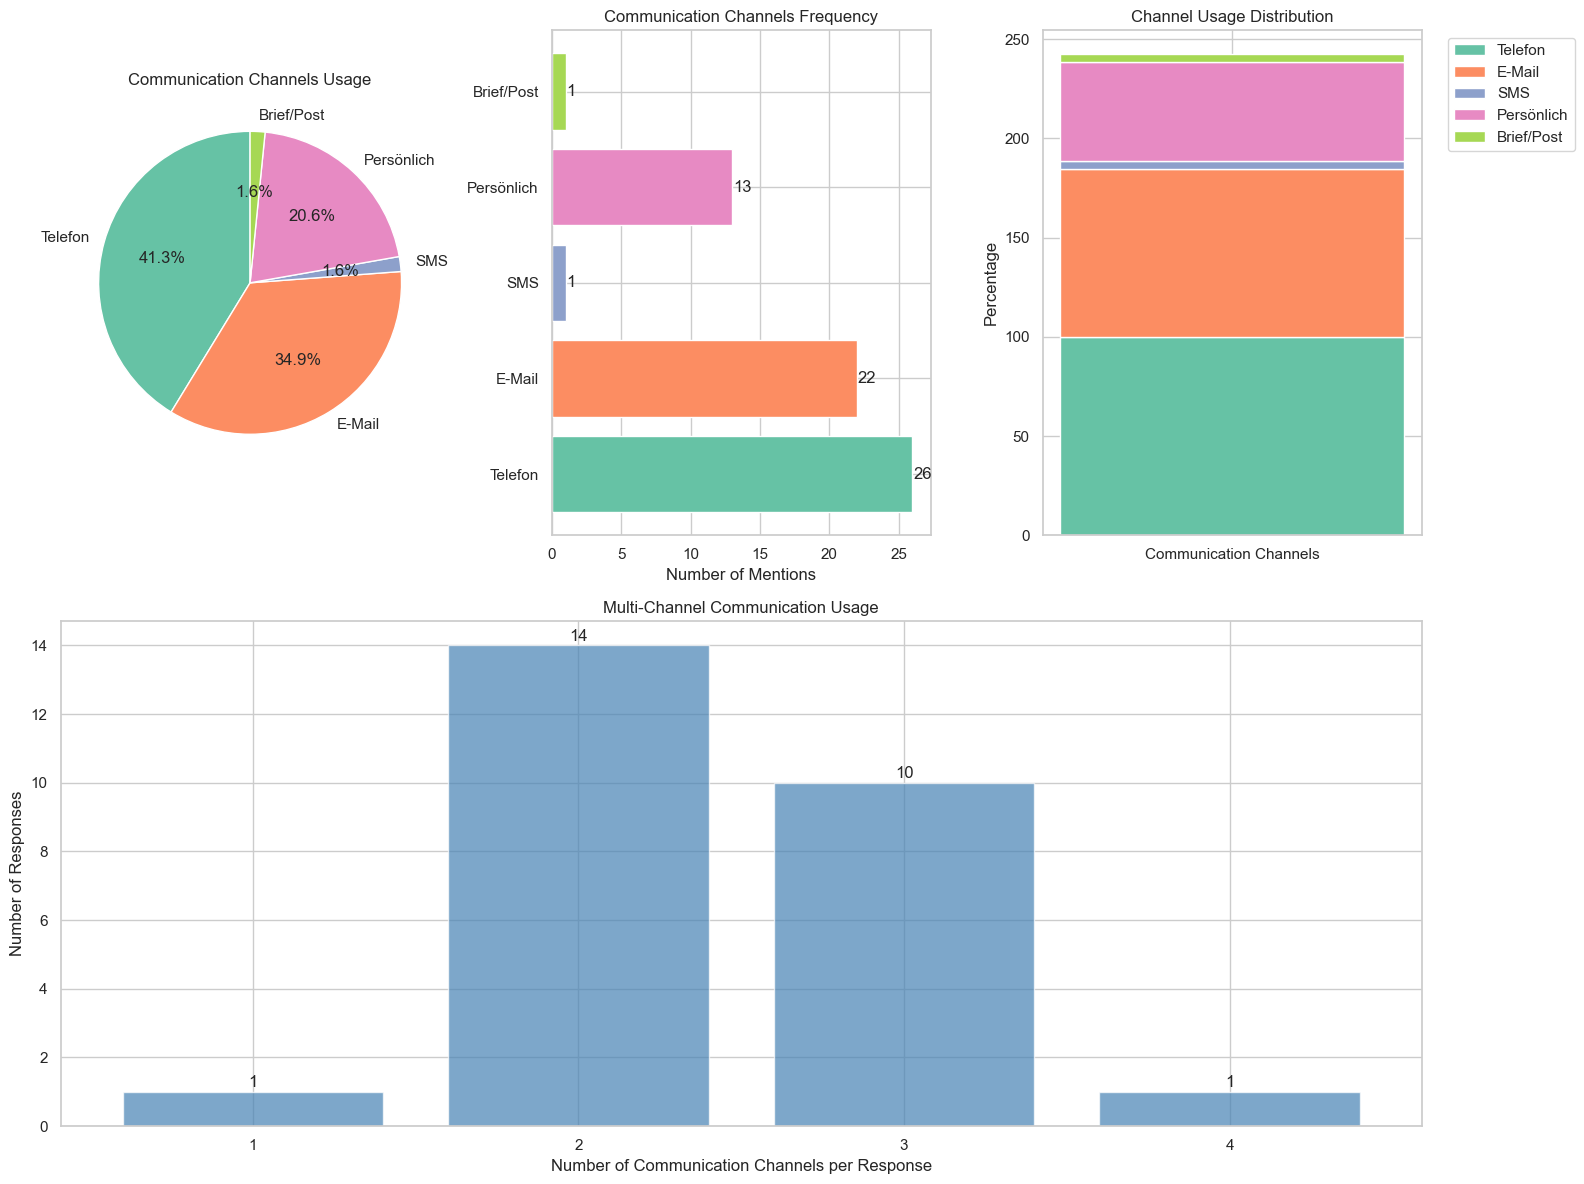

Communication Channel Analysis:
- Telefon: 26 mentions (100.0% of responses)
- E-Mail: 22 mentions (84.6% of responses)
- SMS: 1 mentions (3.8% of responses)
- Persönlich: 13 mentions (50.0% of responses)
- Brief/Post: 1 mentions (3.8% of responses)


In [51]:
# Communication channels analysis with visualizations
comm_col = None
for col in df.columns:
    if 'Über welche Kanäle kontaktieren' in col:
        comm_col = col
        break

if comm_col and not df[comm_col].dropna().empty:
    # Extract communication channels from responses
    channel_keywords = {
        'Telefon': ['telefon', 'anruf', 'phone'],
        'E-Mail': ['email', 'e-mail', 'mail'],
        'SMS': ['sms', 'text', 'nachricht'],
        'WhatsApp': ['whatsapp', 'messenger'],
        'Persönlich': ['persönlich', 'direkt', 'vor ort'],
        'Brief/Post': ['brief', 'post', 'schriftlich']
    }
    
    channel_counts = {channel: 0 for channel in channel_keywords.keys()}
    
    for response in df[comm_col].dropna():
        response_lower = response.lower()
        for channel, keywords in channel_keywords.items():
            if any(keyword in response_lower for keyword in keywords):
                channel_counts[channel] += 1
    
    # Create comprehensive visualization
    plt.figure(figsize=(16, 12))
    
    # Main pie chart
    plt.subplot(2, 3, 1)
    valid_channels = {k: v for k, v in channel_counts.items() if v > 0}
    if valid_channels:
        colors = plt.cm.Set2(range(len(valid_channels)))
        wedges, texts, autotexts = plt.pie(valid_channels.values(), labels=valid_channels.keys(), 
                                          autopct='%1.1f%%', colors=colors, startangle=90)
        plt.title('Communication Channels Usage')
    
    # Horizontal bar chart
    plt.subplot(2, 3, 2)
    if valid_channels:
        y_pos = range(len(valid_channels))
        bars = plt.barh(y_pos, list(valid_channels.values()), 
                       color=plt.cm.Set2(range(len(valid_channels))))
        plt.yticks(y_pos, list(valid_channels.keys()))
        plt.xlabel('Number of Mentions')
        plt.title('Communication Channels Frequency')
        
        # Add value labels
        for i, (bar, count) in enumerate(zip(bars, valid_channels.values())):
            plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
                     f'{count}', ha='left', va='center')
    
    # Stacked bar for comparison
    plt.subplot(2, 3, 3)
    if valid_channels:
        total_responses = len(df[comm_col].dropna())
        percentages = [count/total_responses*100 for count in valid_channels.values()]
        plt.bar(['Communication Channels'], [100], color='lightgray', alpha=0.3)
        
        bottom = 0
        for i, (channel, percentage) in enumerate(zip(valid_channels.keys(), percentages)):
            plt.bar(['Communication Channels'], [percentage], bottom=bottom, 
                   label=channel, color=plt.cm.Set2(i))
            bottom += percentage
        
        plt.ylabel('Percentage')
        plt.title('Channel Usage Distribution')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Communication preferences analysis
    plt.subplot(2, 1, 2)
    if len(df[comm_col].dropna()) > 0:
        # Create a more detailed analysis
        response_analysis = []
        for idx, response in enumerate(df[comm_col].dropna()):
            channels_used = []
            for channel, keywords in channel_keywords.items():
                if any(keyword in response.lower() for keyword in keywords):
                    channels_used.append(channel)
            response_analysis.append({
                'Response': idx + 1,
                'Channels': channels_used,
                'Channel_Count': len(channels_used)
            })
        
        # Plot channel combination frequency
        channel_counts_per_response = [item['Channel_Count'] for item in response_analysis]
        unique_counts = list(set(channel_counts_per_response))
        count_frequency = [channel_counts_per_response.count(count) for count in unique_counts]
        
        plt.bar(unique_counts, count_frequency, color='steelblue', alpha=0.7)
        plt.xlabel('Number of Communication Channels per Response')
        plt.ylabel('Number of Responses')
        plt.title('Multi-Channel Communication Usage')
        plt.xticks(unique_counts)
        
        # Add value labels
        for x, y in zip(unique_counts, count_frequency):
            plt.text(x, y + 0.05, f'{y}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("Communication Channel Analysis:")
    for channel, count in channel_counts.items():
        if count > 0:
            percentage = (count / len(df[comm_col].dropna())) * 100
            print(f"- {channel}: {count} mentions ({percentage:.1f}% of responses)")
else:
    print("Communication channels data not available")

### Software Usage Analysis

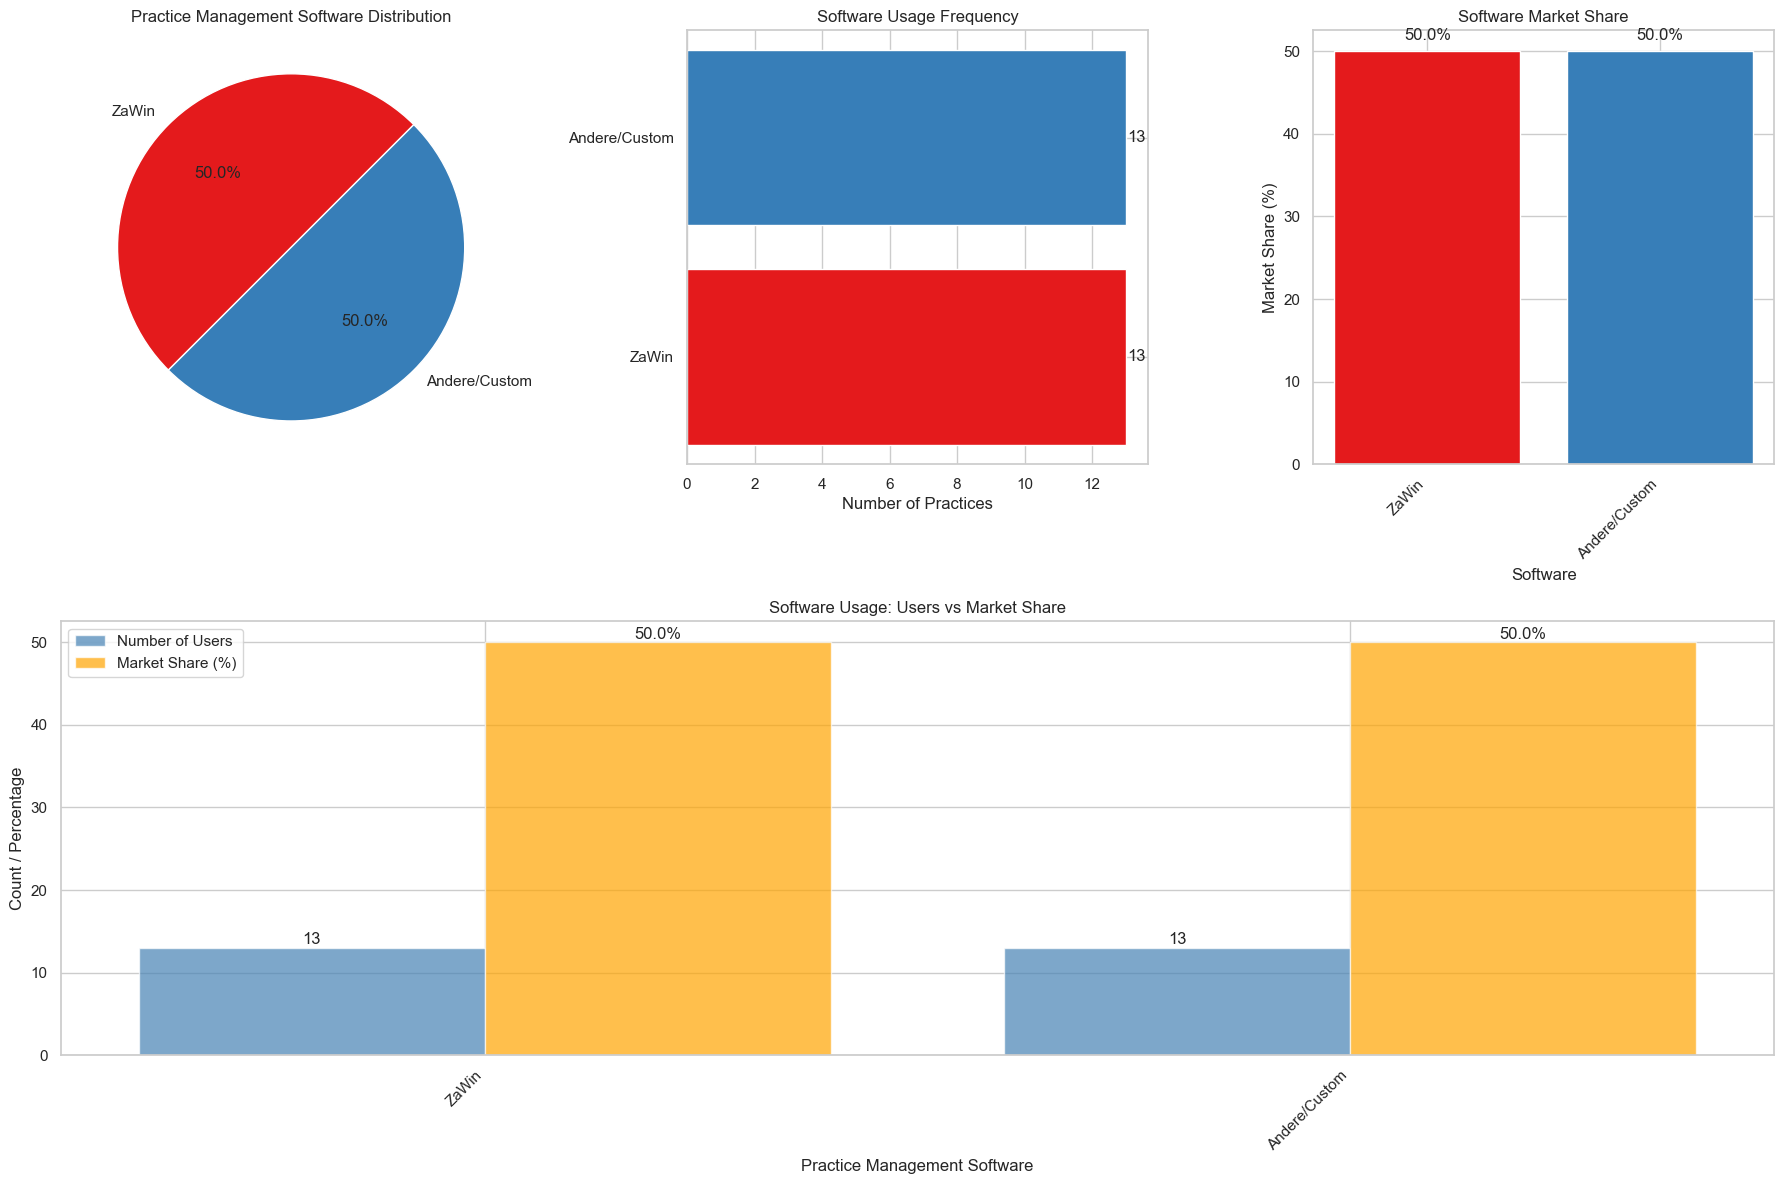

Software Usage Analysis Summary:
Total responses analyzed: 26
- ZaWin: 13 practices (50.0%)
- Andere/Custom: 13 practices (50.0%)

Software Market Insights:
- Most popular software: ZaWin (13 users)
- Software diversity: 2 different systems mentioned
- Market concentration: Top software has 50.0% market share


In [52]:
# Software usage analysis with comprehensive visualizations
software_col = None
for col in df.columns:
    if 'Praxisverwaltungssoftware' in col:
        software_col = col
        break

if software_col and not df[software_col].dropna().empty:
    # Extract software mentions from responses
    software_keywords = {
        'ZaWin': ['zawin', 'za-win'],
        'Charly': ['charly'],
        'Evident': ['evident'],
        'Dampsoft': ['dampsoft', 'damp soft'],
        'Carestream': ['carestream'],
        'OpenDental': ['opendental', 'open dental'],
        'PracticeWorks': ['practiceworks', 'practice works'],
        'Andere/Custom': ['custom', 'eigenentwicklung', 'selbst']
    }
    
    software_counts = {software: 0 for software in software_keywords.keys()}
    
    for response in df[software_col].dropna():
        response_lower = response.lower()
        found_software = False
        for software, keywords in software_keywords.items():
            if any(keyword in response_lower for keyword in keywords):
                software_counts[software] += 1
                found_software = True
                break
        
        # If no specific software found, categorize as "Andere/Custom"
        if not found_software and response.strip():
            software_counts['Andere/Custom'] += 1
    
    # Create comprehensive software analysis visualization
    plt.figure(figsize=(18, 12))
    
    # Main software distribution pie chart
    plt.subplot(2, 3, 1)
    valid_software = {k: v for k, v in software_counts.items() if v > 0}
    if valid_software:
        colors = plt.cm.Set1(range(len(valid_software)))
        wedges, texts, autotexts = plt.pie(valid_software.values(), labels=valid_software.keys(), 
                                          autopct='%1.1f%%', colors=colors, startangle=45)
        plt.title('Practice Management Software Distribution')
    
    # Horizontal bar chart
    plt.subplot(2, 3, 2)
    if valid_software:
        y_pos = range(len(valid_software))
        bars = plt.barh(y_pos, list(valid_software.values()), 
                       color=plt.cm.Set1(range(len(valid_software))))
        plt.yticks(y_pos, list(valid_software.keys()))
        plt.xlabel('Number of Practices')
        plt.title('Software Usage Frequency')
        
        # Add value labels
        for i, (bar, count) in enumerate(zip(bars, valid_software.values())):
            plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
                     f'{count}', ha='left', va='center')
    
    # Market share visualization
    plt.subplot(2, 3, 3)
    if valid_software:
        total_software_users = sum(valid_software.values())
        market_share = [(count/total_software_users)*100 for count in valid_software.values()]
        
        plt.bar(range(len(valid_software)), market_share, 
                color=plt.cm.Set1(range(len(valid_software))))
        plt.xlabel('Software')
        plt.ylabel('Market Share (%)')
        plt.title('Software Market Share')
        plt.xticks(range(len(valid_software)), list(valid_software.keys()), rotation=45, ha='right')
        
        # Add percentage labels
        for i, percentage in enumerate(market_share):
            plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')
    
    # Software satisfaction/integration analysis (placeholder for future data)
    plt.subplot(2, 1, 2)
    
    # Create a comparison chart showing software mentions vs. total responses
    software_data = []
    total_responses = len(df[software_col].dropna())
    
    for software, count in valid_software.items():
        software_data.append({
            'Software': software,
            'Users': count,
            'Market_Share': (count/total_responses)*100 if total_responses > 0 else 0
        })
    
    if software_data:
        software_df = pd.DataFrame(software_data)
        
        # Create a detailed comparison
        x_pos = range(len(software_df))
        bars1 = plt.bar([x - 0.2 for x in x_pos], software_df['Users'], 0.4, 
                       label='Number of Users', color='steelblue', alpha=0.7)
        bars2 = plt.bar([x + 0.2 for x in x_pos], software_df['Market_Share'], 0.4, 
                       label='Market Share (%)', color='orange', alpha=0.7)
        
        plt.xlabel('Practice Management Software')
        plt.ylabel('Count / Percentage')
        plt.title('Software Usage: Users vs Market Share')
        plt.xticks(x_pos, software_df['Software'], rotation=45, ha='right')
        plt.legend()
        
        # Add value labels
        for bar in bars1:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                     f'{int(bar.get_height())}', ha='center', va='bottom')
        for bar in bars2:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                     f'{bar.get_height():.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("Software Usage Analysis Summary:")
    print(f"Total responses analyzed: {len(df[software_col].dropna())}")
    for software, count in software_counts.items():
        if count > 0:
            percentage = (count / len(df[software_col].dropna())) * 100
            print(f"- {software}: {count} practices ({percentage:.1f}%)")
    
    # Additional software insights
    print(f"\nSoftware Market Insights:")
    if valid_software:
        top_software = max(valid_software.items(), key=lambda x: x[1])
        print(f"- Most popular software: {top_software[0]} ({top_software[1]} users)")
        print(f"- Software diversity: {len(valid_software)} different systems mentioned")
        print(f"- Market concentration: Top software has {(top_software[1]/sum(valid_software.values()))*100:.1f}% market share")
else:
    print("Software data not available for analysis")

### Pain Points and Challenges Visualization

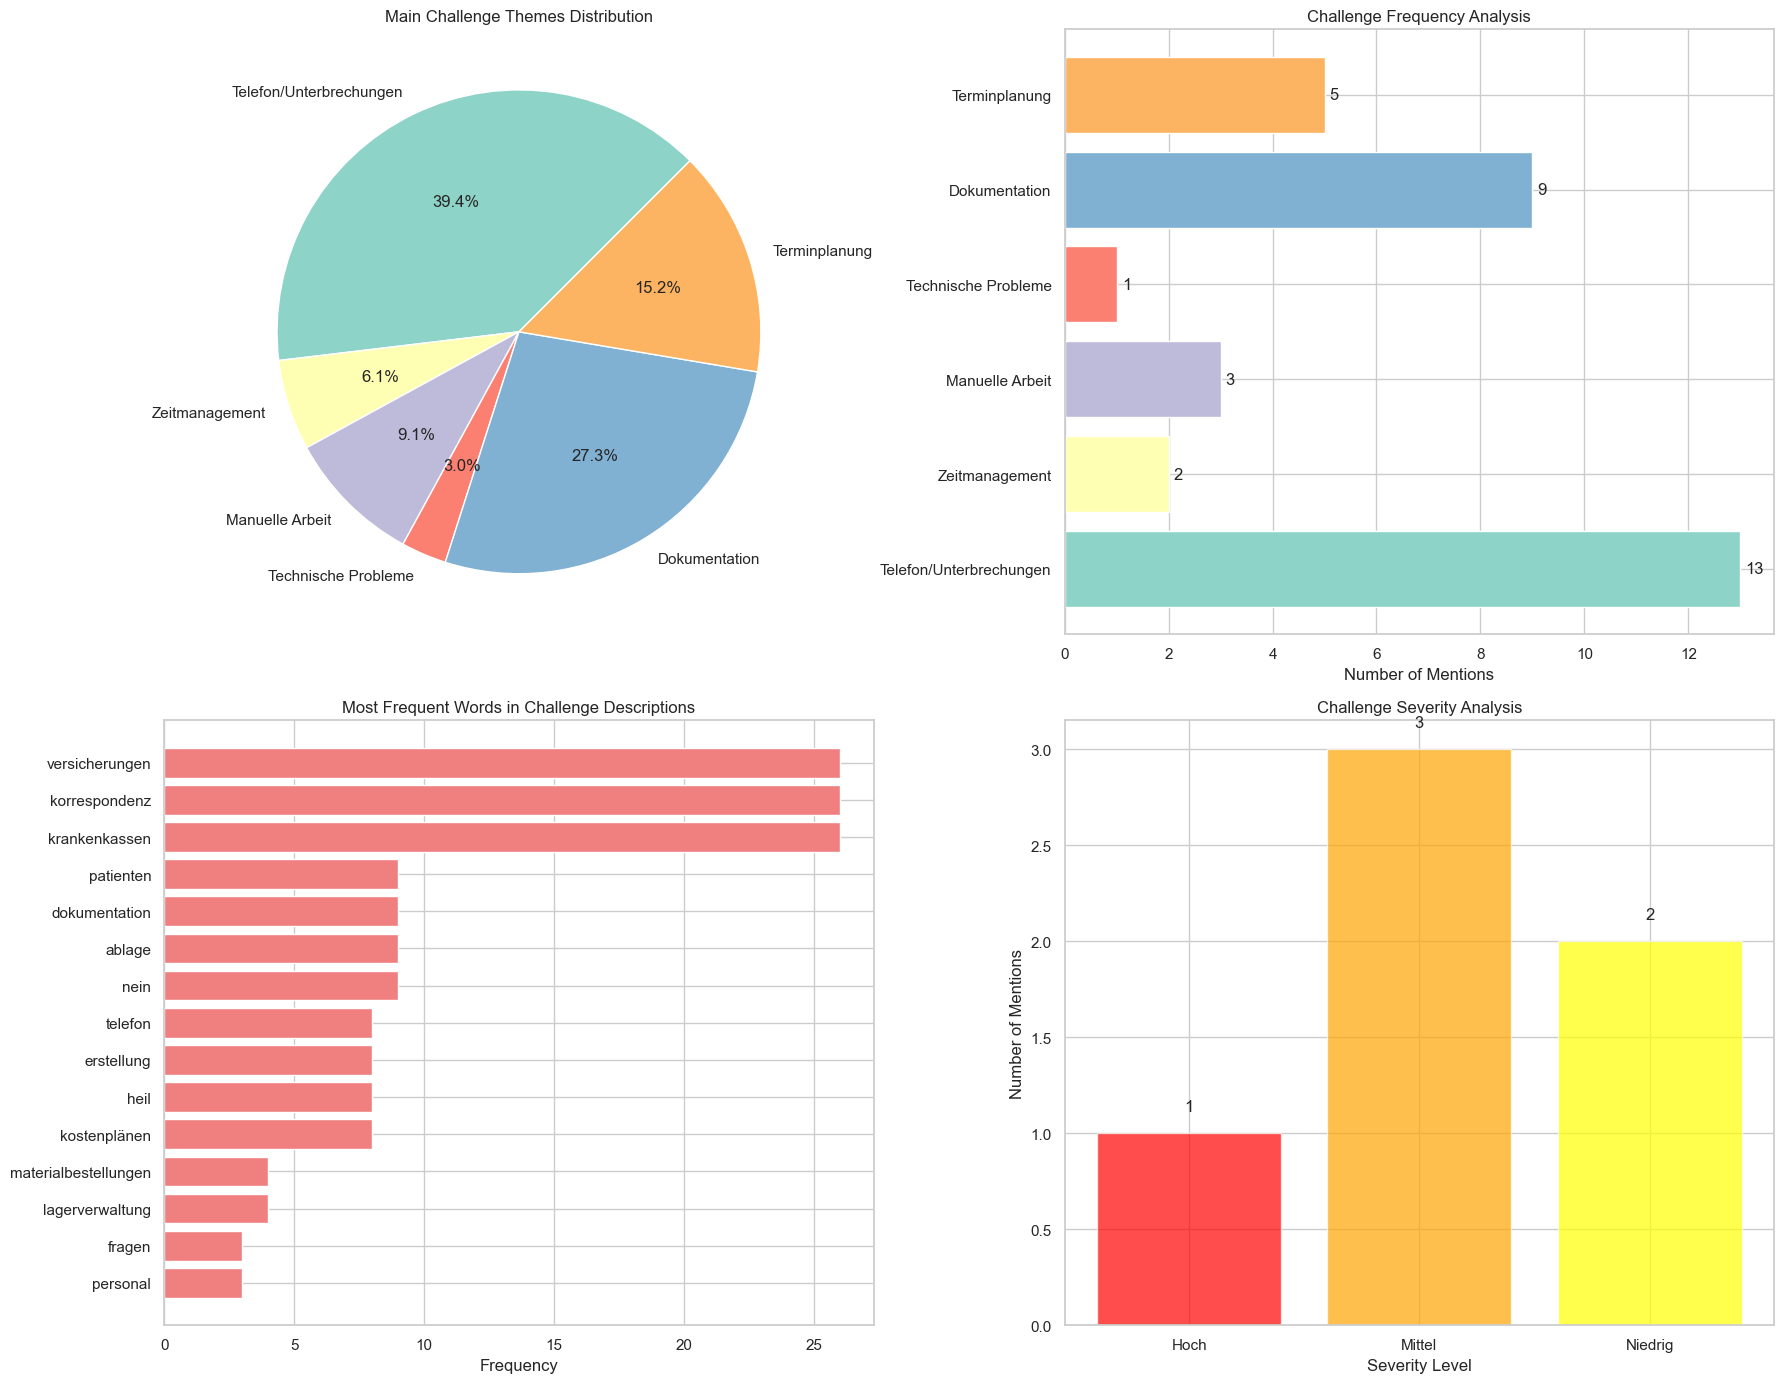

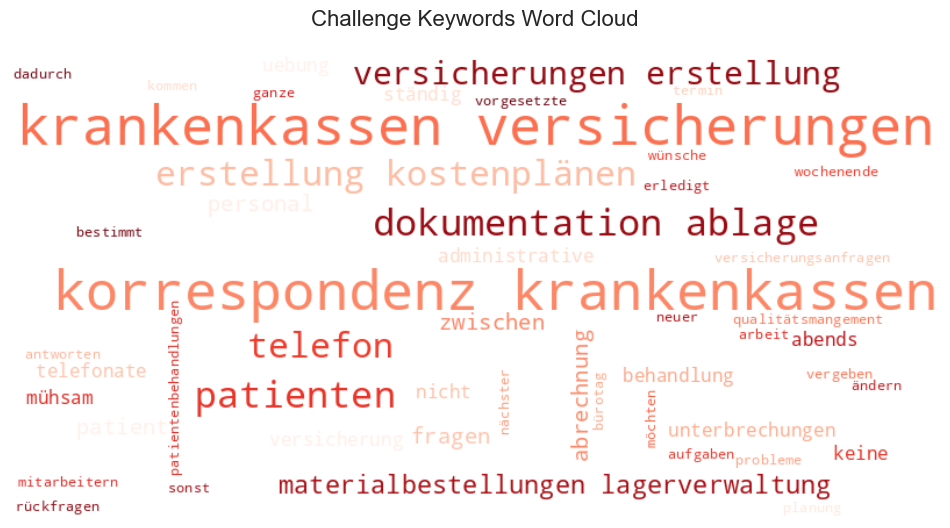

Challenge Analysis Summary:
Total challenge responses analyzed: 73
Number of challenge categories: 3

Top Challenge Themes:
- Telefon/Unterbrechungen: 13 mentions (17.8%)
- Dokumentation: 9 mentions (12.3%)
- Terminplanung: 5 mentions (6.8%)
- Manuelle Arbeit: 3 mentions (4.1%)
- Zeitmanagement: 2 mentions (2.7%)
- Technische Probleme: 1 mentions (1.4%)

Most frequently mentioned challenge words:
- 'versicherungen': 26 times
- 'korrespondenz': 26 times
- 'krankenkassen': 26 times
- 'patienten': 9 times
- 'dokumentation': 9 times


In [53]:
# Pain points and challenges analysis with visualizations
from collections import Counter
import re
from wordcloud import WordCloud

# Find challenge-related columns
challenge_keywords = ['störfaktoren', 'herausforderungen', 'mühsam', 'zeitaufwendig', 'schwierig', 'problem']
challenge_cols = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in challenge_keywords):
        challenge_cols.append(col)

if challenge_cols:
    # Combine all challenge responses
    all_challenges = []
    for col in challenge_cols:
        responses = df[col].dropna()
        all_challenges.extend(responses.tolist())
    
    if all_challenges:
        # Extract key challenge themes
        challenge_themes = {
            'Telefon/Unterbrechungen': ['telefon', 'anruf', 'unterbrechung', 'störung', 'klingeln'],
            'Zeitmanagement': ['zeit', 'zeitaufwendig', 'zeitraubend', 'schnell', 'stress'],
            'Manuelle Arbeit': ['manuell', 'hand', 'übertragen', 'kopieren', 'eingeben'],
            'Kommunikation': ['kommunikation', 'information', 'weiterleitung', 'abstimmung'],
            'Technische Probleme': ['system', 'software', 'technik', 'computer', 'fehler'],
            'Dokumentation': ['dokumentation', 'notizen', 'aufschreiben', 'festhalten'],
            'Terminplanung': ['termin', 'planung', 'kalender', 'buchung', 'vereinbarung']
        }
        
        theme_counts = {theme: 0 for theme in challenge_themes.keys()}
        
        for response in all_challenges:
            response_lower = response.lower()
            for theme, keywords in challenge_themes.items():
                if any(keyword in response_lower for keyword in keywords):
                    theme_counts[theme] += 1
        
        # Create comprehensive visualization
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Theme frequency pie chart
        valid_themes = {k: v for k, v in theme_counts.items() if v > 0}
        if valid_themes:
            colors = plt.cm.Set3(range(len(valid_themes)))
            wedges, texts, autotexts = ax1.pie(valid_themes.values(), labels=valid_themes.keys(), 
                                              autopct='%1.1f%%', colors=colors, startangle=45)
            ax1.set_title('Main Challenge Themes Distribution')
        
        # Horizontal bar chart
        if valid_themes:
            y_pos = range(len(valid_themes))
            bars = ax2.barh(y_pos, list(valid_themes.values()), 
                           color=plt.cm.Set3(range(len(valid_themes))))
            ax2.set_yticks(y_pos)
            ax2.set_yticklabels(list(valid_themes.keys()))
            ax2.set_xlabel('Number of Mentions')
            ax2.set_title('Challenge Frequency Analysis')
            
            # Add value labels
            for i, (bar, count) in enumerate(zip(bars, valid_themes.values())):
                ax2.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                         f'{count}', ha='left', va='center')
        
        # Word frequency analysis
        all_text = ' '.join(all_challenges).lower()
        words = re.findall(r'\b[a-zA-ZäöüÄÖÜß]{4,}\b', all_text)
        
        # German stopwords
        german_stopwords = {
            'sind', 'sich', 'eine', 'einen', 'einer', 'mich', 'für', 'und', 'der', 'die', 'das', 
            'ich', 'bin', 'haben', 'mit', 'von', 'auf', 'als', 'auch', 'oder', 'aber', 'wenn', 
            'wird', 'werden', 'wurde', 'kann', 'könnte', 'sollte', 'muss', 'müssen', 'immer', 
            'sehr', 'noch', 'mehr', 'gibt', 'geht', 'kommt', 'macht', 'sein', 'seine', 'seiner'
        }
        
        relevant_words = [word for word in words if word not in german_stopwords and len(word) > 3]
        word_freq = Counter(relevant_words).most_common(15)
        
        if word_freq:
            words_list, counts_list = zip(*word_freq)
            ax3.barh(range(len(words_list)), counts_list, color='lightcoral')
            ax3.set_yticks(range(len(words_list)))
            ax3.set_yticklabels(words_list)
            ax3.set_xlabel('Frequency')
            ax3.set_title('Most Frequent Words in Challenge Descriptions')
            ax3.invert_yaxis()
        
        # Challenge severity analysis (based on emotional words)
        severity_keywords = {
            'Hoch': ['extrem', 'sehr', 'enorm', 'massive', 'große', 'schwierig', 'unmöglich'],
            'Mittel': ['oft', 'häufig', 'regelmäßig', 'immer wieder', 'ständig'],
            'Niedrig': ['manchmal', 'gelegentlich', 'selten', 'wenig']
        }
        
        severity_counts = {level: 0 for level in severity_keywords.keys()}
        
        for response in all_challenges:
            response_lower = response.lower()
            for level, keywords in severity_keywords.items():
                if any(keyword in response_lower for keyword in keywords):
                    severity_counts[level] += 1
        
        if any(severity_counts.values()):
            ax4.bar(severity_counts.keys(), severity_counts.values(), 
                   color=['red', 'orange', 'yellow'], alpha=0.7)
            ax4.set_xlabel('Severity Level')
            ax4.set_ylabel('Number of Mentions')
            ax4.set_title('Challenge Severity Analysis')
            
            # Add value labels
            for i, (level, count) in enumerate(severity_counts.items()):
                if count > 0:
                    ax4.text(i, count + 0.1, f'{count}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Generate word cloud for challenges
        try:
            if all_text:
                # Filter text for word cloud
                filtered_text = ' '.join([word for word in relevant_words if len(word) > 4])
                
                if filtered_text:
                    plt.figure(figsize=(12, 8))
                    wordcloud = WordCloud(width=800, height=400, 
                                        background_color='white',
                                        colormap='Reds',
                                        max_words=50).generate(filtered_text)
                    
                    plt.imshow(wordcloud, interpolation='bilinear')
                    plt.axis('off')
                    plt.title('Challenge Keywords Word Cloud', fontsize=16, pad=20)
                    plt.show()
        except ImportError:
            print("WordCloud library not available. Install with: pip install wordcloud")
        
        print("Challenge Analysis Summary:")
        print(f"Total challenge responses analyzed: {len(all_challenges)}")
        print(f"Number of challenge categories: {len(challenge_cols)}")
        
        print("\nTop Challenge Themes:")
        for theme, count in sorted(theme_counts.items(), key=lambda x: x[1], reverse=True):
            if count > 0:
                percentage = (count / len(all_challenges)) * 100
                print(f"- {theme}: {count} mentions ({percentage:.1f}%)")
        
        print(f"\nMost frequently mentioned challenge words:")
        for word, count in word_freq[:5]:
            print(f"- '{word}': {count} times")
            
else:
    print("No challenge-related columns found for analysis")

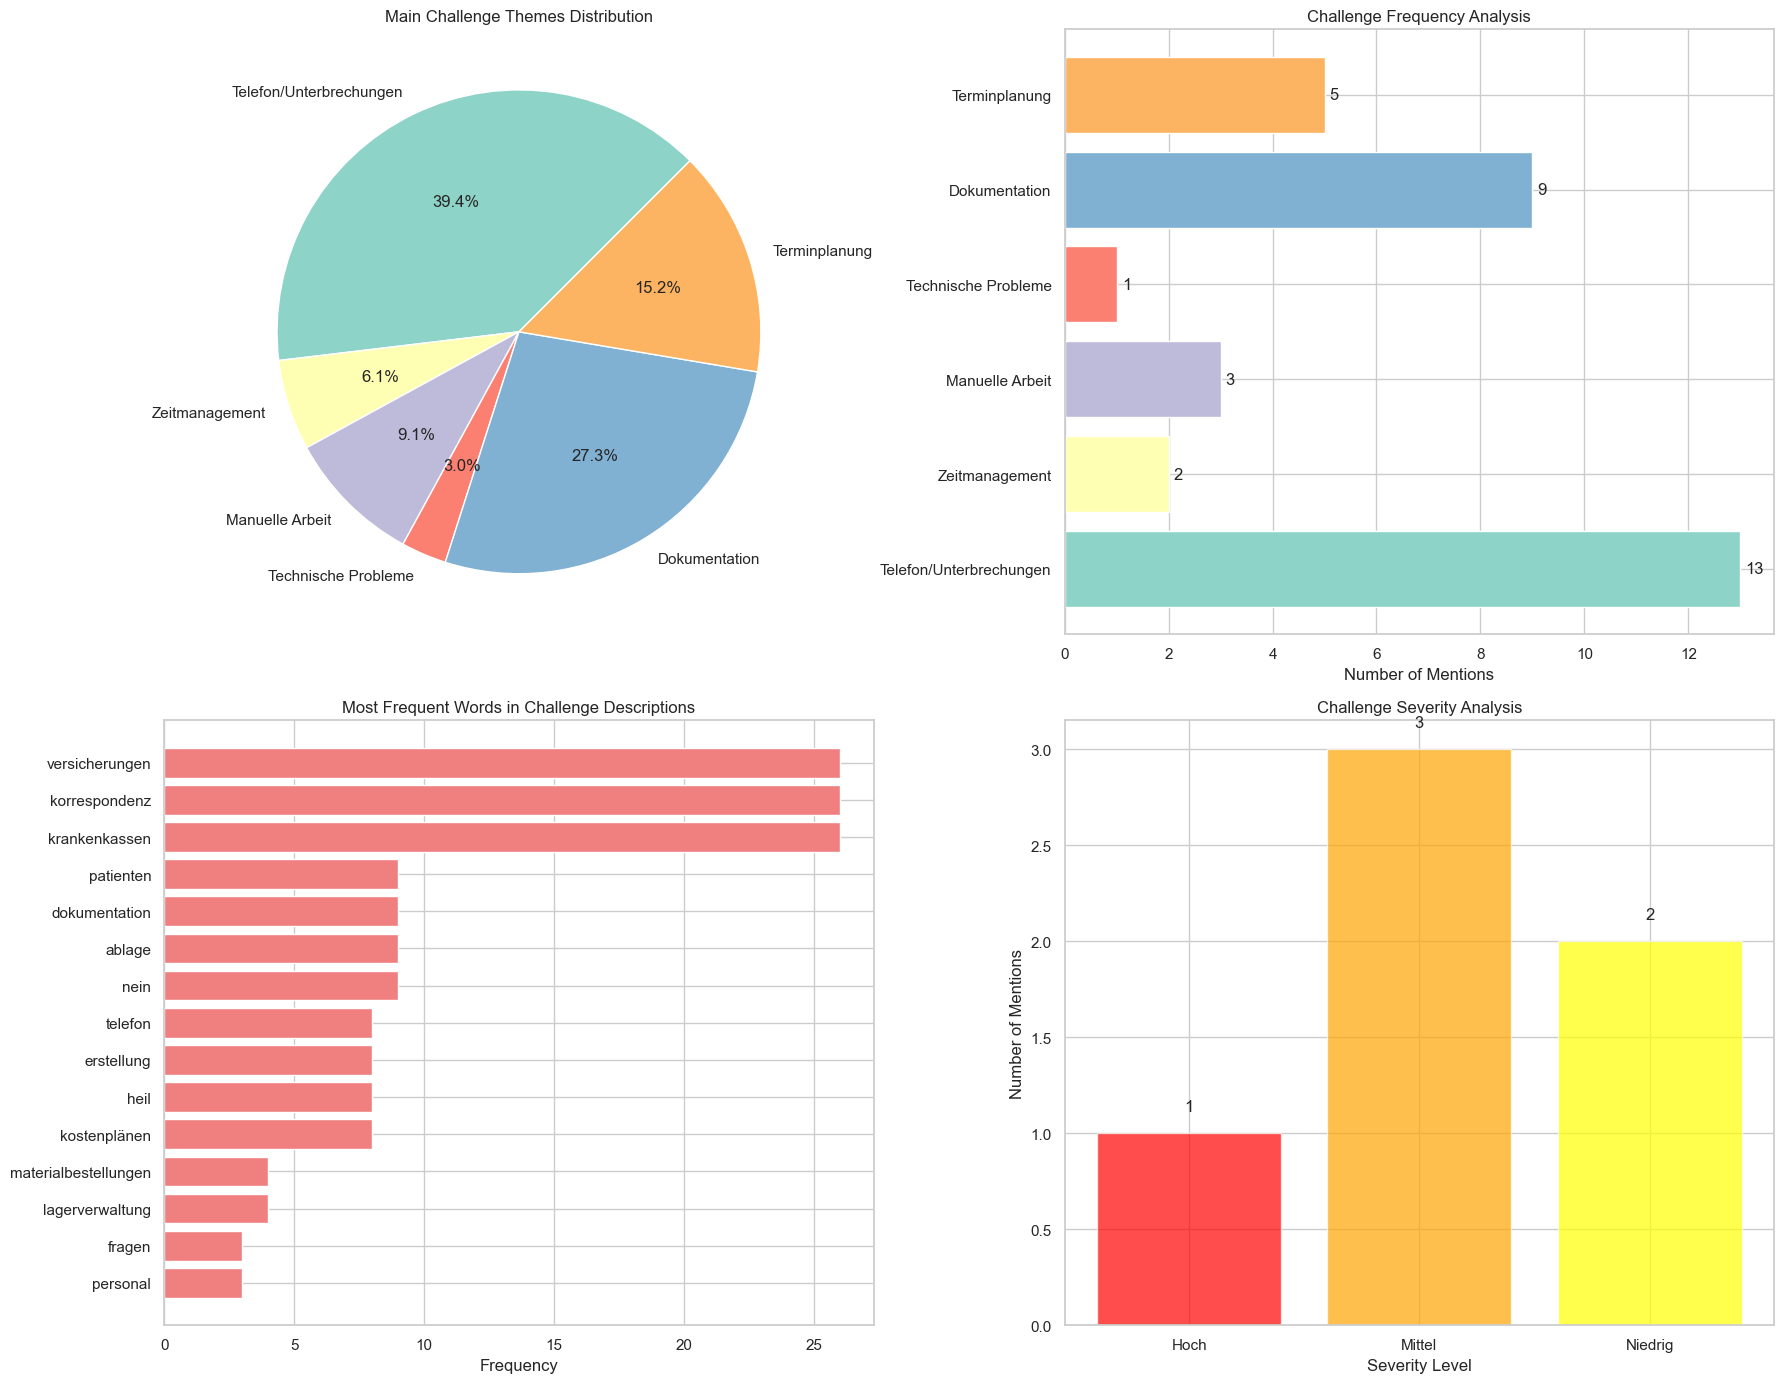

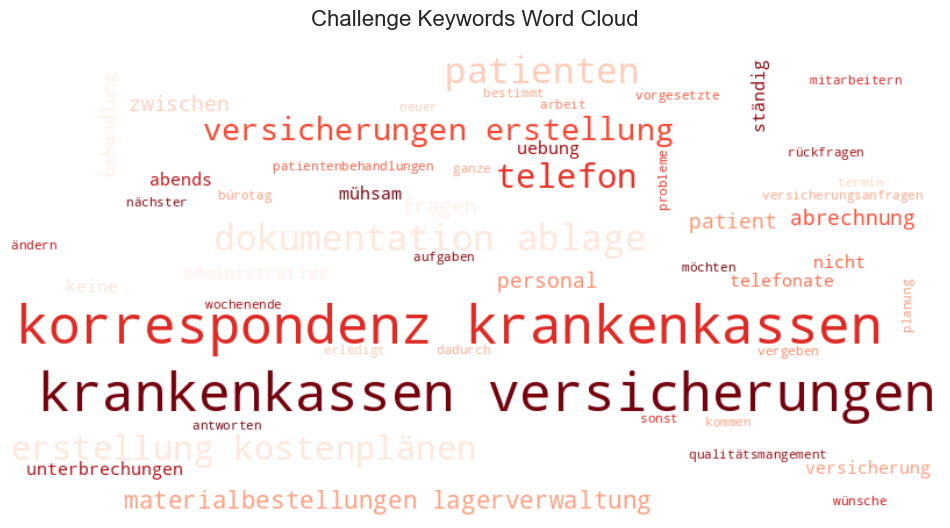

Challenge Analysis Summary:
Total challenge responses analyzed: 73
Number of challenge categories: 3

Top Challenge Themes:
- Telefon/Unterbrechungen: 13 mentions (17.8%)
- Dokumentation: 9 mentions (12.3%)
- Terminplanung: 5 mentions (6.8%)
- Manuelle Arbeit: 3 mentions (4.1%)
- Zeitmanagement: 2 mentions (2.7%)
- Technische Probleme: 1 mentions (1.4%)

Most frequently mentioned challenge words:
- 'versicherungen': 26 times
- 'korrespondenz': 26 times
- 'krankenkassen': 26 times
- 'patienten': 9 times
- 'dokumentation': 9 times


In [54]:
# Pain points and challenges analysis with visualizations
from collections import Counter
import re

# Try to import wordcloud, but make it optional
try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    WORDCLOUD_AVAILABLE = False
    print("Note: WordCloud library not available. Word cloud visualization will be skipped.")

# Find challenge-related columns
challenge_keywords = ['störfaktoren', 'herausforderungen', 'mühsam', 'zeitaufwendig', 'schwierig', 'problem']
challenge_cols = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in challenge_keywords):
        challenge_cols.append(col)

if challenge_cols:
    # Combine all challenge responses
    all_challenges = []
    for col in challenge_cols:
        responses = df[col].dropna()
        all_challenges.extend(responses.tolist())
    
    if all_challenges:
        # Extract key challenge themes
        challenge_themes = {
            'Telefon/Unterbrechungen': ['telefon', 'anruf', 'unterbrechung', 'störung', 'klingeln'],
            'Zeitmanagement': ['zeit', 'zeitaufwendig', 'zeitraubend', 'schnell', 'stress'],
            'Manuelle Arbeit': ['manuell', 'hand', 'übertragen', 'kopieren', 'eingeben'],
            'Kommunikation': ['kommunikation', 'information', 'weiterleitung', 'abstimmung'],
            'Technische Probleme': ['system', 'software', 'technik', 'computer', 'fehler'],
            'Dokumentation': ['dokumentation', 'notizen', 'aufschreiben', 'festhalten'],
            'Terminplanung': ['termin', 'planung', 'kalender', 'buchung', 'vereinbarung']
        }
        
        theme_counts = {theme: 0 for theme in challenge_themes.keys()}
        
        for response in all_challenges:
            response_lower = response.lower()
            for theme, keywords in challenge_themes.items():
                if any(keyword in response_lower for keyword in keywords):
                    theme_counts[theme] += 1
        
        # Create comprehensive visualization
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # Theme frequency pie chart
        valid_themes = {k: v for k, v in theme_counts.items() if v > 0}
        if valid_themes:
            colors = plt.cm.Set3(range(len(valid_themes)))
            wedges, texts, autotexts = ax1.pie(valid_themes.values(), labels=valid_themes.keys(), 
                                              autopct='%1.1f%%', colors=colors, startangle=45)
            ax1.set_title('Main Challenge Themes Distribution')
        
        # Horizontal bar chart
        if valid_themes:
            y_pos = range(len(valid_themes))
            bars = ax2.barh(y_pos, list(valid_themes.values()), 
                           color=plt.cm.Set3(range(len(valid_themes))))
            ax2.set_yticks(y_pos)
            ax2.set_yticklabels(list(valid_themes.keys()))
            ax2.set_xlabel('Number of Mentions')
            ax2.set_title('Challenge Frequency Analysis')
            
            # Add value labels
            for i, (bar, count) in enumerate(zip(bars, valid_themes.values())):
                ax2.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                         f'{count}', ha='left', va='center')
        
        # Word frequency analysis
        all_text = ' '.join(all_challenges).lower()
        words = re.findall(r'\b[a-zA-ZäöüÄÖÜß]{4,}\b', all_text)
        
        # German stopwords
        german_stopwords = {
            'sind', 'sich', 'eine', 'einen', 'einer', 'mich', 'für', 'und', 'der', 'die', 'das', 
            'ich', 'bin', 'haben', 'mit', 'von', 'auf', 'als', 'auch', 'oder', 'aber', 'wenn', 
            'wird', 'werden', 'wurde', 'kann', 'könnte', 'sollte', 'muss', 'müssen', 'immer', 
            'sehr', 'noch', 'mehr', 'gibt', 'geht', 'kommt', 'macht', 'sein', 'seine', 'seiner'
        }
        
        relevant_words = [word for word in words if word not in german_stopwords and len(word) > 3]
        word_freq = Counter(relevant_words).most_common(15)
        
        if word_freq:
            words_list, counts_list = zip(*word_freq)
            ax3.barh(range(len(words_list)), counts_list, color='lightcoral')
            ax3.set_yticks(range(len(words_list)))
            ax3.set_yticklabels(words_list)
            ax3.set_xlabel('Frequency')
            ax3.set_title('Most Frequent Words in Challenge Descriptions')
            ax3.invert_yaxis()
        
        # Challenge severity analysis (based on emotional words)
        severity_keywords = {
            'Hoch': ['extrem', 'sehr', 'enorm', 'massive', 'große', 'schwierig', 'unmöglich'],
            'Mittel': ['oft', 'häufig', 'regelmäßig', 'immer wieder', 'ständig'],
            'Niedrig': ['manchmal', 'gelegentlich', 'selten', 'wenig']
        }
        
        severity_counts = {level: 0 for level in severity_keywords.keys()}
        
        for response in all_challenges:
            response_lower = response.lower()
            for level, keywords in severity_keywords.items():
                if any(keyword in response_lower for keyword in keywords):
                    severity_counts[level] += 1
        
        if any(severity_counts.values()):
            ax4.bar(severity_counts.keys(), severity_counts.values(), 
                   color=['red', 'orange', 'yellow'], alpha=0.7)
            ax4.set_xlabel('Severity Level')
            ax4.set_ylabel('Number of Mentions')
            ax4.set_title('Challenge Severity Analysis')
            
            # Add value labels
            for i, (level, count) in enumerate(severity_counts.items()):
                if count > 0:
                    ax4.text(i, count + 0.1, f'{count}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Generate word cloud for challenges if available
        if WORDCLOUD_AVAILABLE and all_text:
            # Filter text for word cloud
            filtered_text = ' '.join([word for word in relevant_words if len(word) > 4])
            
            if filtered_text:
                plt.figure(figsize=(12, 8))
                wordcloud = WordCloud(width=800, height=400, 
                                    background_color='white',
                                    colormap='Reds',
                                    max_words=50).generate(filtered_text)
                
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.title('Challenge Keywords Word Cloud', fontsize=16, pad=20)
                plt.show()
        
        print("Challenge Analysis Summary:")
        print(f"Total challenge responses analyzed: {len(all_challenges)}")
        print(f"Number of challenge categories: {len(challenge_cols)}")
        
        print("\nTop Challenge Themes:")
        for theme, count in sorted(theme_counts.items(), key=lambda x: x[1], reverse=True):
            if count > 0:
                percentage = (count / len(all_challenges)) * 100
                print(f"- {theme}: {count} mentions ({percentage:.1f}%)")
        
        print(f"\nMost frequently mentioned challenge words:")
        for word, count in word_freq[:5]:
            print(f"- '{word}': {count} times")
            
else:
    print("No challenge-related columns found for analysis")

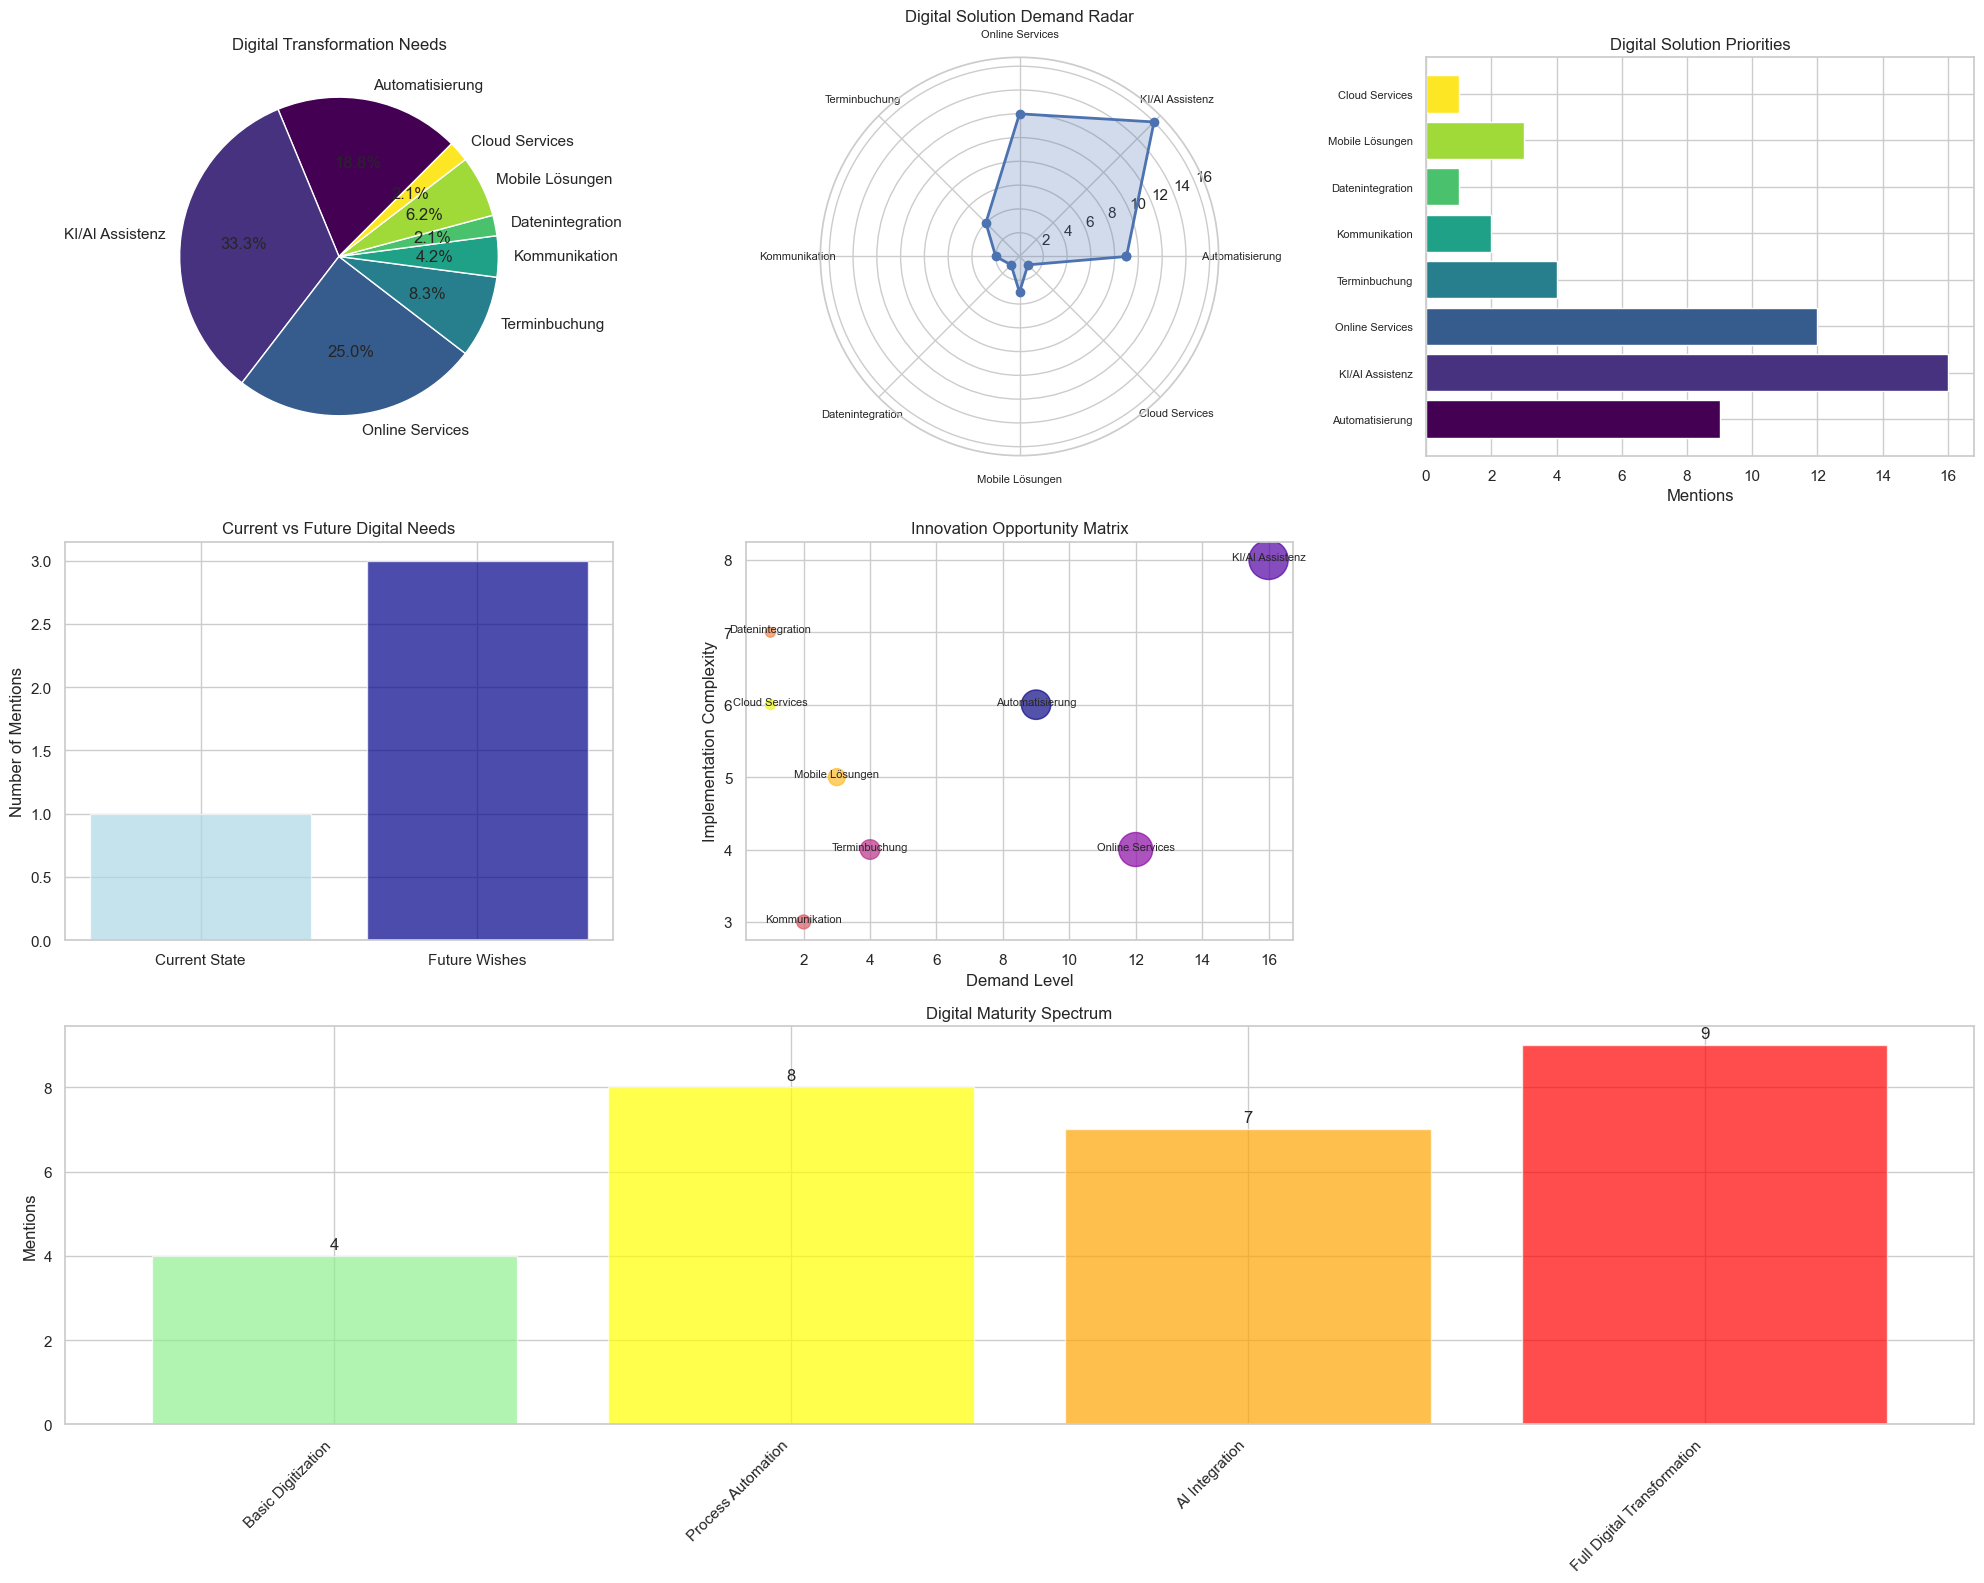

Digital Transformation Analysis Summary:
Total digital-related responses: 156
Number of digital transformation questions: 6

Top Digital Solution Categories:
- KI/AI Assistenz: 16 mentions (10.3%)
- Online Services: 12 mentions (7.7%)
- Automatisierung: 9 mentions (5.8%)
- Terminbuchung: 4 mentions (2.6%)
- Mobile Lösungen: 3 mentions (1.9%)
- Kommunikation: 2 mentions (1.3%)
- Datenintegration: 1 mentions (0.6%)
- Cloud Services: 1 mentions (0.6%)

Digital Readiness Indicators:
- Future-focused mentions: 3
- Current state mentions: 1
→ Strong future orientation - High transformation potential


In [55]:
# Digital transformation analysis with future-focused visualizations
digital_keywords = ['digital', 'online', 'automatisch', 'ki', 'assistent', 'app', 'software']
digital_cols = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in digital_keywords):
        digital_cols.append(col)

if digital_cols:
    # Combine all digital transformation responses
    all_digital_responses = []
    for col in digital_cols:
        responses = df[col].dropna()
        all_digital_responses.extend(responses.tolist())
    
    if all_digital_responses:
        # Digital solution categories
        digital_categories = {
            'Automatisierung': ['automatisch', 'automation', 'auto', 'selbstständig'],
            'KI/AI Assistenz': ['ki', 'künstliche intelligenz', 'ai', 'assistent', 'intelligent'],
            'Online Services': ['online', 'web', 'internet', 'digital', 'app'],
            'Terminbuchung': ['termin', 'buchung', 'appointment', 'calendar', 'kalender'],
            'Kommunikation': ['kommunikation', 'chat', 'messenger', 'sms', 'email'],
            'Datenintegration': ['integration', 'schnittstelle', 'verbindung', 'sync'],
            'Mobile Lösungen': ['mobile', 'smartphone', 'tablet', 'app', 'handy'],
            'Cloud Services': ['cloud', 'backup', 'speicher', 'online speicher']
        }
        
        category_counts = {category: 0 for category in digital_categories.keys()}
        
        for response in all_digital_responses:
            response_lower = response.lower()
            for category, keywords in digital_categories.items():
                if any(keyword in response_lower for keyword in keywords):
                    category_counts[category] += 1
        
        # Create comprehensive digital transformation visualization
        fig = plt.figure(figsize=(20, 16))
        
        # Main digital needs pie chart
        ax1 = plt.subplot(3, 3, 1)
        valid_categories = {k: v for k, v in category_counts.items() if v > 0}
        if valid_categories:
            colors = plt.cm.viridis(np.linspace(0, 1, len(valid_categories)))
            wedges, texts, autotexts = ax1.pie(valid_categories.values(), labels=valid_categories.keys(), 
                                              autopct='%1.1f%%', colors=colors, startangle=45)
            ax1.set_title('Digital Transformation Needs')
        
        # Digital readiness radar chart (simulated)
        ax2 = plt.subplot(3, 3, 2, projection='polar')
        if valid_categories:
            categories = list(valid_categories.keys())
            values = list(valid_categories.values())
            
            # Create angles for radar chart
            angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
            values += values[:1]  # Complete the circle
            angles += angles[:1]
            
            ax2.plot(angles, values, 'o-', linewidth=2, label='Current Demand')
            ax2.fill(angles, values, alpha=0.25)
            ax2.set_xticks(angles[:-1])
            ax2.set_xticklabels(categories, fontsize=8)
            ax2.set_title('Digital Solution Demand Radar')
        
        # Horizontal bar chart
        ax3 = plt.subplot(3, 3, 3)
        if valid_categories:
            y_pos = range(len(valid_categories))
            bars = ax3.barh(y_pos, list(valid_categories.values()), 
                           color=plt.cm.viridis(np.linspace(0, 1, len(valid_categories))))
            ax3.set_yticks(y_pos)
            ax3.set_yticklabels(list(valid_categories.keys()), fontsize=8)
            ax3.set_xlabel('Mentions')
            ax3.set_title('Digital Solution Priorities')
        
        # Future vs Current state analysis
        ax4 = plt.subplot(3, 3, 4)
        future_keywords = ['wunsch', 'wünschen', 'träumen', 'perfekt', 'ideal', 'zukunft']
        current_keywords = ['aktuell', 'derzeit', 'momentan', 'jetzt', 'heute']
        
        future_mentions = sum(1 for response in all_digital_responses 
                             if any(keyword in response.lower() for keyword in future_keywords))
        current_mentions = sum(1 for response in all_digital_responses 
                              if any(keyword in response.lower() for keyword in current_keywords))
        
        ax4.bar(['Current State', 'Future Wishes'], [current_mentions, future_mentions], 
               color=['lightblue', 'darkblue'], alpha=0.7)
        ax4.set_ylabel('Number of Mentions')
        ax4.set_title('Current vs Future Digital Needs')
        
        # Innovation potential matrix
        ax5 = plt.subplot(3, 3, 5)
        # Simulate innovation potential vs implementation difficulty
        innovation_data = []
        for category, count in valid_categories.items():
            # Simulate difficulty (higher for complex solutions)
            difficulty_map = {
                'KI/AI Assistenz': 8, 'Datenintegration': 7, 'Cloud Services': 6,
                'Mobile Lösungen': 5, 'Online Services': 4, 'Automatisierung': 6,
                'Kommunikation': 3, 'Terminbuchung': 4
            }
            difficulty = difficulty_map.get(category, 5)
            innovation_data.append((count, difficulty, category))
        
        if innovation_data:
            x_vals, y_vals, labels = zip(*innovation_data)
            scatter = ax5.scatter(x_vals, y_vals, s=[x*50 for x in x_vals], 
                                 c=range(len(x_vals)), cmap='plasma', alpha=0.7)
            
            for i, label in enumerate(labels):
                ax5.annotate(label, (x_vals[i], y_vals[i]), fontsize=8, ha='center')
            
            ax5.set_xlabel('Demand Level')
            ax5.set_ylabel('Implementation Complexity')
            ax5.set_title('Innovation Opportunity Matrix')
        
        # Digital maturity timeline
        ax6 = plt.subplot(3, 1, 3)
        # Simulate adoption timeline based on responses
        adoption_phases = {
            'Basic Digitization': ['email', 'computer', 'software'],
            'Process Automation': ['automatisch', 'system', 'integration'],
            'AI Integration': ['ki', 'intelligent', 'assistent'],
            'Full Digital Transformation': ['digital', 'transformation', 'komplett']
        }
        
        phase_scores = {}
        for phase, keywords in adoption_phases.items():
            score = sum(1 for response in all_digital_responses 
                       if any(keyword in response.lower() for keyword in keywords))
            phase_scores[phase] = score
        
        phases = list(phase_scores.keys())
        scores = list(phase_scores.values())
        
        bars = ax6.bar(range(len(phases)), scores, 
                      color=['lightgreen', 'yellow', 'orange', 'red'], alpha=0.7)
        ax6.set_xticks(range(len(phases)))
        ax6.set_xticklabels(phases, rotation=45, ha='right')
        ax6.set_ylabel('Mentions')
        ax6.set_title('Digital Maturity Spectrum')
        
        # Add value labels
        for bar, score in zip(bars, scores):
            if score > 0:
                ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                         f'{score}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        print("Digital Transformation Analysis Summary:")
        print(f"Total digital-related responses: {len(all_digital_responses)}")
        print(f"Number of digital transformation questions: {len(digital_cols)}")
        
        print("\nTop Digital Solution Categories:")
        for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
            if count > 0:
                percentage = (count / len(all_digital_responses)) * 100
                print(f"- {category}: {count} mentions ({percentage:.1f}%)")
        
        print(f"\nDigital Readiness Indicators:")
        print(f"- Future-focused mentions: {future_mentions}")
        print(f"- Current state mentions: {current_mentions}")
        
        if future_mentions > current_mentions:
            print("→ Strong future orientation - High transformation potential")
        else:
            print("→ Current focus - Immediate solution needs")
            
else:
    print("No digital transformation columns found for analysis")